# **Exploratory Data Analysis: Student Social Media Addiction**

## **1. Introduction**
Media sosial telah menjadi bagian tak terpisahkan dari kehidupan siswa. Studi ini bertujuan untuk mengeksplorasi pola penggunaan media sosial siswa dan dampaknya terhadap aspek kehidupan mereka, seperti prestasi akademik, kesehatan mental, dan hubungan sosial.

**Dataset Source:** [Kaggle](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships/code)  
**Objective:**  
- Memahami pola penggunaan media sosial siswa.  
- Menganalisis korelasi antara durasi penggunaan media sosial dengan variabel lainnya.

## **2. Exploratory Data Analysis**


### **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Gathering Data**

In [4]:
# Memuat dataset
df = pd.read_csv("Students Social Media Addiction.csv")

# Melihat 5 data pertama dari dataset
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Insight:**

Dataset ini mencakup informasi seperti:  
- **Student_ID:** ID unik setiap siswa.
- **Age:** Usia siswa.
- **Gender:** Jenis kelamin siswa (Female/Male).
- **Academic_Level:** Tingkat pendidikan (Undergraduate, Graduate, High School).
- **Country:** Negara asal siswa.
- **Avg_Daily_Usage_Hours:** Rata-rata waktu penggunaan media sosial per hari (jam).
- **Most_Used_Platform:** Platform media sosial yang paling sering digunakan.
- **Affects_Academic_Performance:** Apakah penggunaan media sosial memengaruhi prestasi akademik? (Yes/No).
- **Sleep_Hours_Per_Night:** Durasi tidur rata-rata siswa per malam (jam).
- **Mental_Health_Score:** Skor kesehatan mental (skala 1-10).
- **Relationship_Status:** Status hubungan siswa (Single, In Relationship, Complicated).
- **Conflicts_Over_Social_Media:** Jumlah konflik terkait media sosial (skala 0-5).
- **Addicted_Score:** Skor kecanduan media sosial (skala 1-10).

### **Data Types**

In [5]:
# Melihat tipe data setiap kolom
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [6]:
# Mengubah kolom object menjadi category
categorical_columns = ['Gender', 'Academic_Level', 'Most_Used_Platform', 
                       'Affects_Academic_Performance', 'Relationship_Status']
df[categorical_columns] = df[categorical_columns].astype('category')

# Cek ulang tipe data
print(df.dtypes)

Student_ID                         int64
Age                                int64
Gender                          category
Academic_Level                  category
Country                           object
Avg_Daily_Usage_Hours            float64
Most_Used_Platform              category
Affects_Academic_Performance    category
Sleep_Hours_Per_Night            float64
Mental_Health_Score                int64
Relationship_Status             category
Conflicts_Over_Social_Media        int64
Addicted_Score                     int64
dtype: object


**Insight:**

Mengubah kolom bertipe `object` menjadi `category` pada fitur seperti 'Gender', 'Academic_Level', dan lainnya untuk mengoptimalkan penggunaan memori dan mempercepat proses analisis data. 

### **Checking the Duplicated Rows**

In [7]:
# Melihat jumlah baris dan jumlah kolom dari dataset
df.shape

(705, 13)

In [8]:
# Melihat jumlah baris yang terduplikat
duplicate_rows_df = df[df.duplicated()]
print("Numbers of duplicated rows: ", duplicate_rows_df.shape)

Numbers of duplicated rows:  (0, 13)


In [9]:
df.count()

Student_ID                      705
Age                             705
Gender                          705
Academic_Level                  705
Country                         705
Avg_Daily_Usage_Hours           705
Most_Used_Platform              705
Affects_Academic_Performance    705
Sleep_Hours_Per_Night           705
Mental_Health_Score             705
Relationship_Status             705
Conflicts_Over_Social_Media     705
Addicted_Score                  705
dtype: int64

**Insight:**

Tidak ditemukan adanya baris dalam dataset yang terduplikasi.

### **Checking the Missing or Null Values**

In [10]:
# Menampilkan seluruh fitur yang memiliki missing value
print(df.isnull().sum())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


**Insight:**

Tidak ditemukan adanya baris pada dataset yang bernilai null.

### **Detecting Outliers**

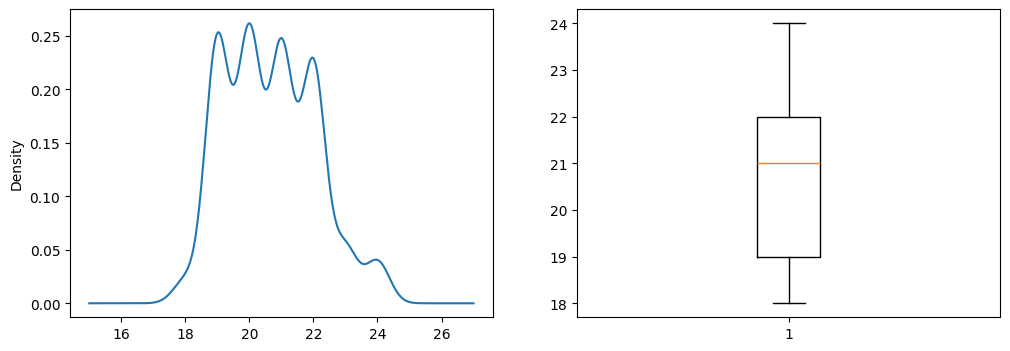

In [12]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df["Age"].plot(kind="kde")
f.add_subplot(1,2,2)
plt.boxplot(df["Age"])
plt.show()

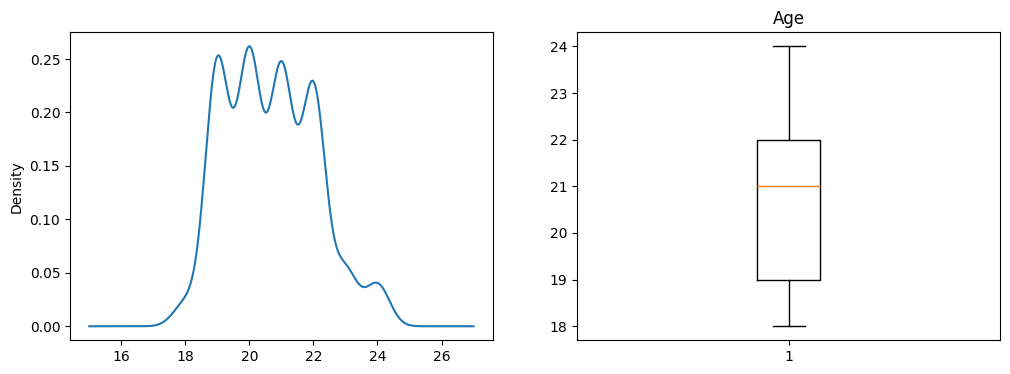

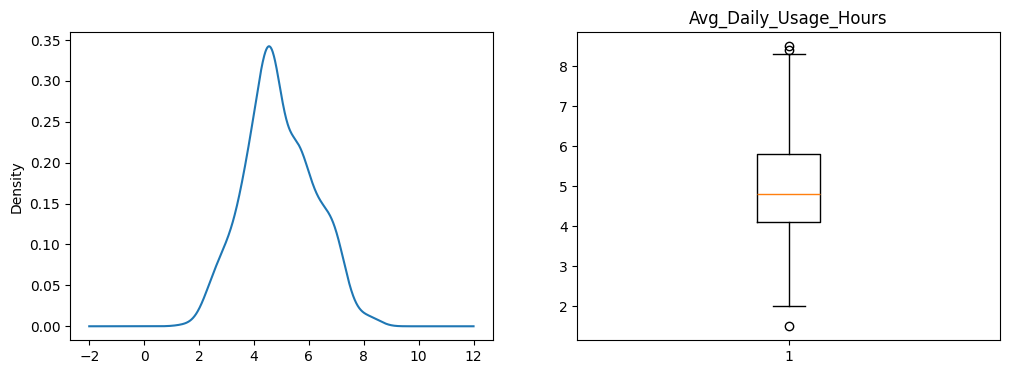

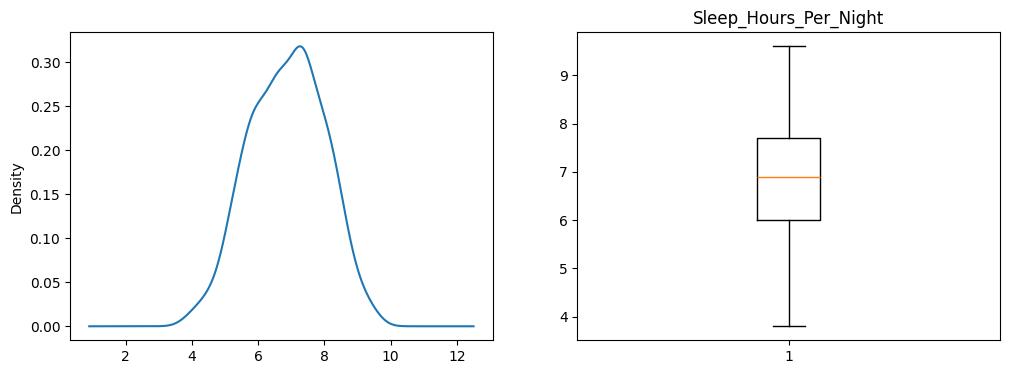

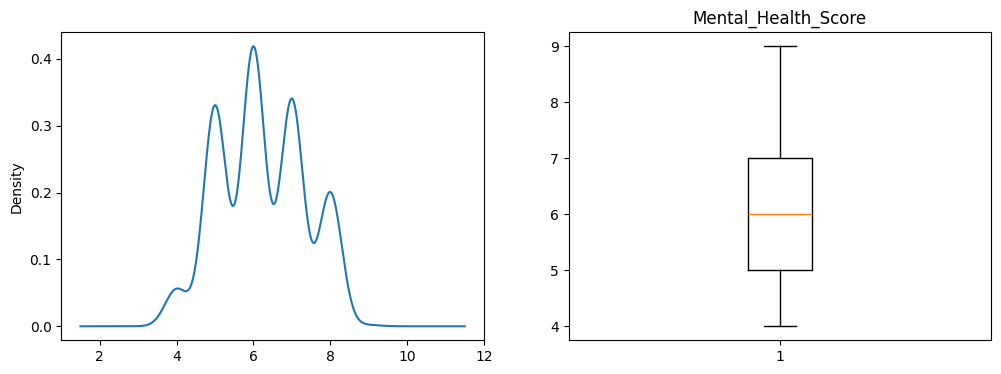

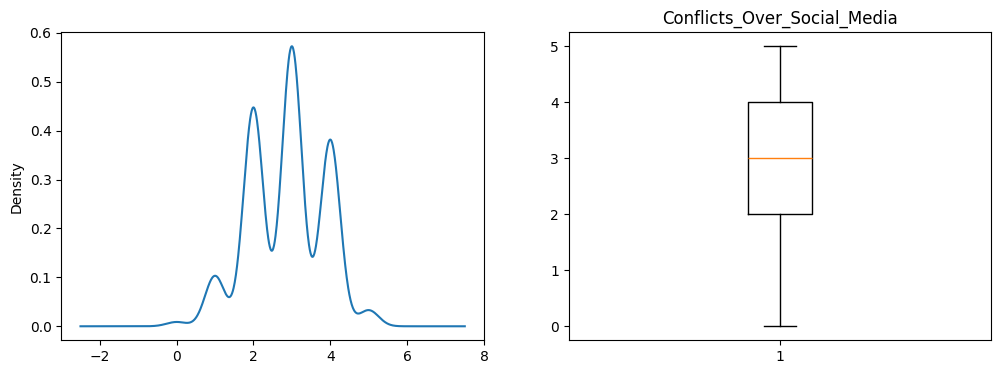

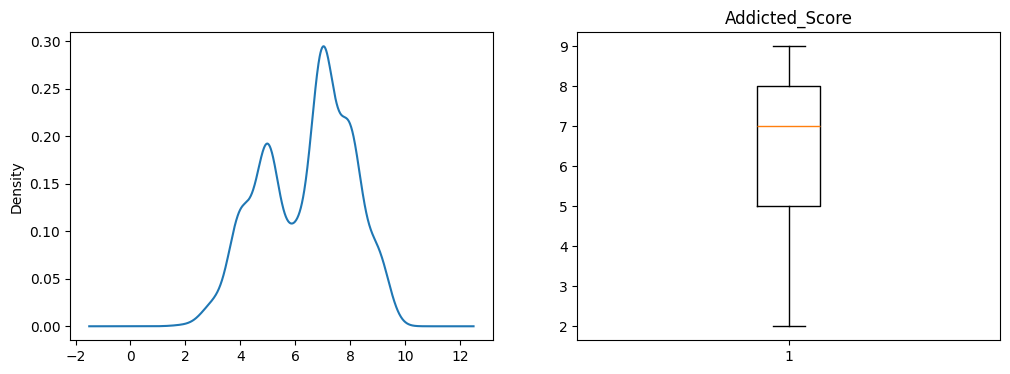

In [ ]:
# Daftar fitur numerik yang akan dicek distribusi dan outlier-nya
features_to_check = ["Age", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Conflicts_Over_Social_Media", "Addicted_Score"]
for feature in features_to_check:
    f = plt.figure(figsize=(12,4))
    f.add_subplot(1,2,1)
    df[feature].plot(kind="kde")
    f.add_subplot(1,2,2)
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

**Insight:**

Data relatif bersih tanpa outlier yang signifikan.

### **Univariate Analysis**

In [ ]:
# Daftar fitur numerik yang akan dianalisis statistik deskriptifnya
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
df[numerical_features].describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


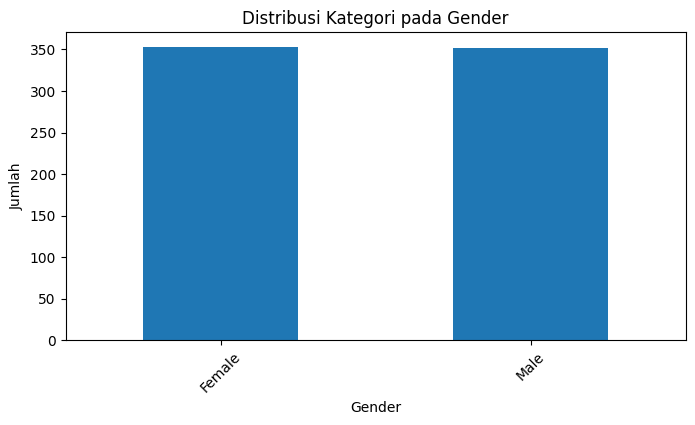

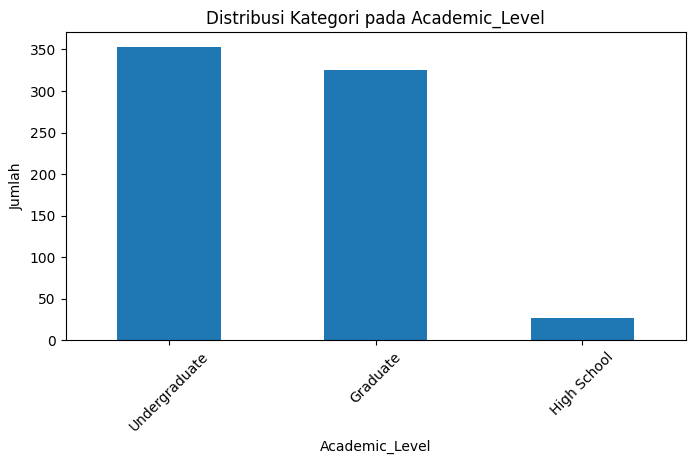

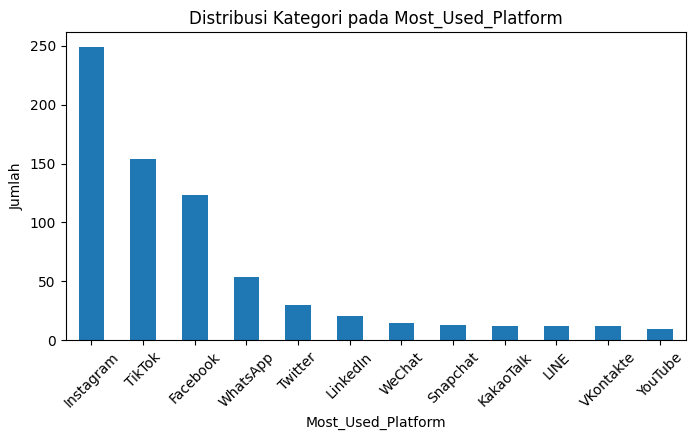

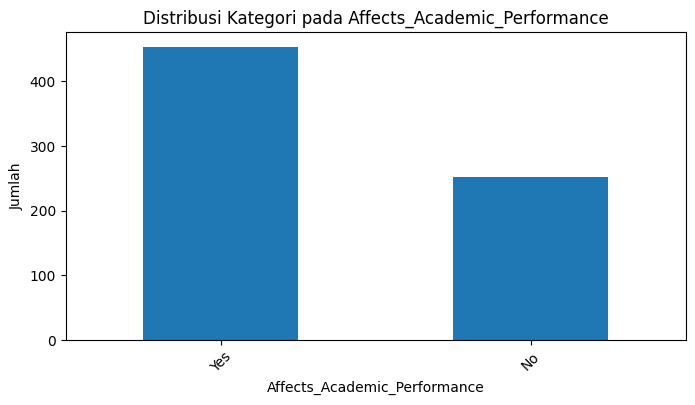

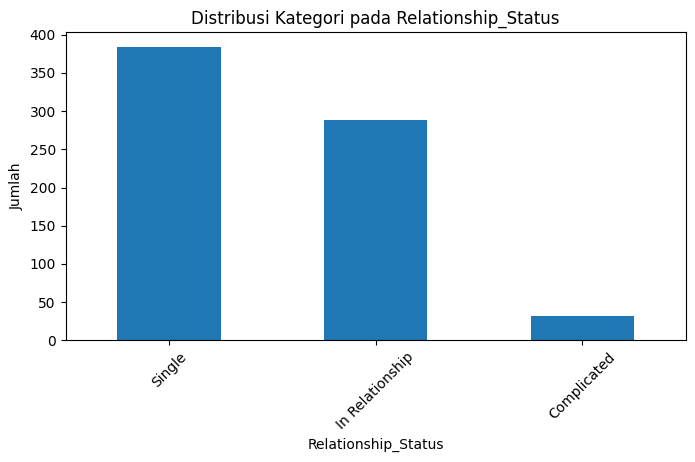

In [18]:
# List fitur kategori yang akan dicek frekuensinya
categorical_columns = ['Gender', 'Academic_Level', 'Most_Used_Platform', 
                       'Affects_Academic_Performance', 'Relationship_Status']

# Loop tiap kolom kategori
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi Kategori pada {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

**Insight:**

Dari histogram tersebut ditemukan bahwa:
- Jumlah data untuk gender Male dan Female sama.
- Kebanyakan pengguna social media yang ada pada data ini Academic_Level-nya Undergraduate dan Graduate.
- Instagram adalah social media yang paling banyak digunakan dibanding yang lainnya.
- Penggunaan media social bagi pelajar lebih banyak mempengaruhi performa akademik.
- Kebanyakan pelajar yang menggunakan social media masih berstatus single.

### **Bivariate Analysis**

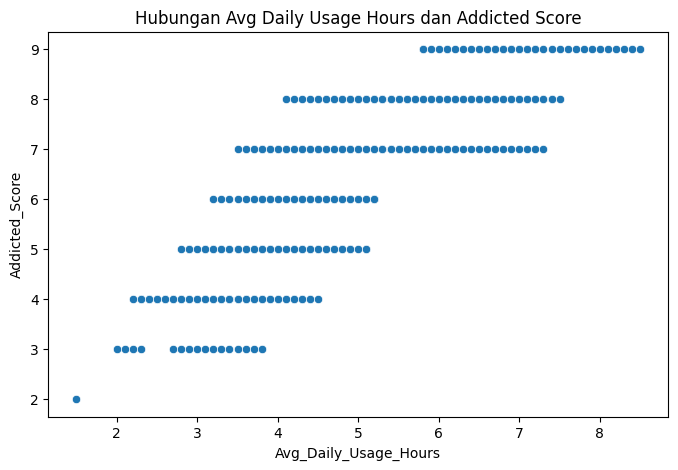

In [19]:
# Membuat scatter plot untuk melihat hubungan antara Avg_Daily_Usage_Hours dan Addicted_Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df)
plt.title('Hubungan Avg Daily Usage Hours dan Addicted Score')  # Judul plot
plt.show()

**Insight:**

Terlihat dari scatter plot tersebut bahwa nilai `Avg_Daily_Usage_Hours` berbanding lurus dengan `Addicted_Score`. Semakin tinggi waktu penggunaan harian, maka addicted scorenya juga semakin tinggi.

In [22]:
# Daftar fitur numerik yang akan dianalisis korelasinya
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                      'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(10,6))
df[numerical_features].corr()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Age,1.000000,-0.113682,0.125265,0.160278,-0.184482,-0.166396
Avg_Daily_Usage_Hours,-0.113682,1.000000,-0.790582,-0.801058,0.804582,0.832000
Sleep_Hours_Per_Night,0.125265,-0.790582,1.000000,0.707439,-0.677266,-0.764858
Mental_Health_Score,0.160278,-0.801058,0.707439,1.000000,-0.893572,-0.945051
Conflicts_Over_Social_Media,-0.184482,0.804582,-0.677266,-0.893572,1.000000,0.933586
Addicted_Score,-0.166396,0.832000,-0.764858,-0.945051,0.933586,1.000000


<Figure size 1000x600 with 0 Axes>

**Insight:** 

Dari hubungan korelasi antar fitur tersebut ditemukan bahwa:
- Avg_Daily_Usage_Hours & Addicted_Score = 0.83,
Artinya, makin lama penggunaan media sosial, makin tinggi skor kecanduan.
- Mental_Health_Score & Addicted_Score = -0.94,
Ini korelasi negatif sangat kuat. Jadi, makin tinggi skor kecanduan, makin rendah kesehatan mental—ini tanda ada pengaruh negatif kecanduan media sosial terhadap mental.
- Conflicts_Over_Social_Media & Addicted_Score = 0.93,
Hubungan positif kuat, konflik soal media sosial makin banyak, kecanduan juga makin tinggi.
- Sleep_Hours_Per_Night & Addicted_Score = -0.76,
Tidur malam yang lebih sedikit berhubungan dengan skor kecanduan yang lebih tinggi.
- Sleep_Hours_Per_Night & Avg_Daily_Usage_Hours = -0.79,
Makin lama penggunaan media sosial, makin sedikit waktu tidur.
- Mental_Health_Score & Conflicts_Over_Social_Media = -0.89,
Konflik di media sosial tinggi, kesehatan mental cenderung menurun.